# IA for HumanForYou

## Context

L'entreprise de produits pharmaceutiques HumanForYou basée en Inde emploie environ 4000 personnes. Cependant, chaque année elle subit un turn-over d'environ 15% de ses employés nécessitant de retrouver des profils similaires sur le marché de l'emploi.

La direction trouve que ce niveau de turn-over n'est pas bon pour l'entreprise car :

Les projets sur lesquels étaient les employés quittant la société prennent du retard ce qui nuit à la réputation de l'entreprise auprès de ses clients et partenaires.

Un service de ressources humaines de taille conséquente doit être conservé car il faut avoir les moyens de trouver les nouvelles recrues.

Du temps est perdu à l'arrivée des nouveaux employés car ils doivent très souvent être formés et ont besoin de temps pour devenir pleinement opérationnels dans leur nouvel environnement.

Le direction fait donc appel à vous, spécialistes de l'analyse de données, pour déterminer les facteurs ayant le plus d'influence sur ce taux de turn-over et lui proposer des modèles afin d'avoir des pistes d'amélioration pour donner à leurs employés l'envie de rester.

Données fournies
Un certain nombre de données concernant les employés vous a donc été transmis par le service des ressources humaines.

Il s'agit de fichiers textes au format CSV.

Les données ont été anonymisées : un employé de l'entreprise sera représenté par le même EmployeeID dans l'ensemble des fichiers qui suivent.


# Imports

In [571]:
import DateTime
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import pandas as pd

## Import des données

On va importer toutes les données dans des tableau

In [572]:
GENERAL_PATH = os.path.join("Datasets")
IN_OUT_TIME_PATH = os.path.join("Datasets", "in_out_time")

MANAGER_SURVEY_CSV = "manager_survey_data.csv"
GENERAL_CSV = "general_data.csv"
IN_TIME_CSV = "in_time.csv"
OUT_TIME_CSV = "out_time.csv"

def load_data(general_path, csv):
    csv_path = os.path.join(general_path, csv)
    df = pd.read_csv(csv_path, sep=",", header = 0)
    return df

In [573]:
general = load_data(GENERAL_PATH, GENERAL_CSV)
in_time = load_data(IN_OUT_TIME_PATH, IN_TIME_CSV)
out_time = load_data(IN_OUT_TIME_PATH, OUT_TIME_CSV)
manager_survey = load_data(GENERAL_PATH, MANAGER_SURVEY_CSV)

## Check des données
On va regarder les prmières lignes des données

In [574]:
general.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [575]:
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2

In [576]:
out_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,2015-01-15 17:22:13,2015-01-16 17:35:11,NaN,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,NaN,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaN,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,NaN,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,NaN,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,NaN,2015-03-27 17:20:51,2

In [577]:
manager_survey.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


## Merge des données en un seul tableau

In [578]:
merged_data = general.merge(manager_survey, how='left', on='EmployeeID')

In [579]:
merged_data.value_counts("JobRole")

JobRole
Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
dtype: int64

In [580]:
def rename_head(df, header):
    for i, col in enumerate(df.columns):
        df.rename({col: header[i]}, axis=1, inplace=True)
    return df

In [581]:
header_in = in_time.columns.to_list()
header_out = out_time.columns.to_list()

In [582]:
header_in[0] = 'EmployeeID'
header_out[0] = 'EmployeeID'

In [583]:
rename_head(in_time, header_in)

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2

In [584]:
rename_head(out_time, header_out)

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,2015-01-15 17:22:13,2015-01-16 17:35:11,NaN,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,NaN,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaN,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,NaN,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,NaN,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,NaN,2015-03-27 17:20:51,2

In [585]:
time_frame = in_time.merge(out_time, how='left', on='EmployeeID')

In [586]:
time_frame

,EmployeeID,2015-01-01_x,2015-01-02_x,2015-01-05_x,2015-01-06_x,2015-01-07_x,2015-01-08_x,2015-01-09_x,2015-01-12_x,2015-01-13_x,2015-01-14_x,2015-01-15_x,2015-01-16_x,2015-01-19_x,2015-01-20_x,2015-01-21_x,2015-01-22_x,2015-01-23_x,2015-01-26_x,2015-01-27_x,2015-01-28_x,2015-01-29_x,2015-01-30_x,2015-02-02_x,2015-02-03_x,2015-02-04_x,2015-02-05_x,2015-02-06_x,2015-02-09_x,2015-02-10_x,2015-02-11_x,2015-02-12_x,2015-02-13_x,2015-02-16_x,2015-02-17_x,2015-02-18_x,2015-02-19_x,2015-02-20_x,2015-02-23_x,2015-02-24_x,2015-02-25_x,2015-02-26_x,2015-02-27_x,2015-03-02_x,2015-03-03_x,2015-03-04_x,2015-03-05_x,2015-03-06_x,2015-03-09_x,2015-03-10_x,2015-03-11_x,2015-03-12_x,2015-03-13_x,2015-03-16_x,2015-03-17_x,2015-03-18_x,2015-03-19_x,2015-03-20_x,2015-03-23_x,2015-03-24_x,2015-03-25_x,2015-03-26_x,2015-03-27_x,2015-03-30_x,2015-03-31_x,2015-04-01_x,2015-04-02_x,2015-04-03_x,2015-04-06_x,2015-04-07_x,2015-04-08_x,2015-04-09_x,2015-04-10_x,2015-04-13_x,2015-04-14_x,2015-04-15_x,2015-04-16_x,2015-04-17_x,2015-04-20_x,2015-04-21_x,2015-04-22_x,2015-04-23_x,2015-04-24_x,2015-04-27_x,2015-04-28_x,2015-04-29_x,2015-04-30_x,2015-05-01_x,2015-05-04_x,2015-05-05_x,2015-05-06_x,2015-05-07_x,2015-05-08_x,2015-05-11_x,2015-05-12_x,2015-05-13_x,2015-05-14_x,2015-05-15_x,2015-05-18_x,2015-05-19_x,2015-05-20_x,2015-05-21_x,2015-05-22_x,2015-05-25_x,2015-05-26_x,2015-05-27_x,2015-05-28_x,2015-05-29_x,2015-06-01_x,2015-06-02_x,2015-06-03_x,2015-06-04_x,2015-06-05_x,2015-06-08_x,2015-06-09_x,2015-06-10_x,2015-06-11_x,2015-06-12_x,2015-06-15_x,2015-06-16_x,2015-06-17_x,2015-06-18_x,2015-06-19_x,2015-06-22_x,2015-06-23_x,2015-06-24_x,2015-06-25_x,2015-06-26_x,2015-06-29_x,2015-06-30_x,2015-07-01_x,2015-07-02_x,2015-07-03_x,2015-07-06_x,2015-07-07_x,2015-07-08_x,2015-07-09_x,2015-07-10_x,2015-07-13_x,2015-07-14_x,2015-07-15_x,2015-07-16_x,2015-07-17_x,2015-07-20_x,2015-07-21_x,2015-07-22_x,2015-07-23_x,2015-07-24_x,2015-07-27_x,2015-07-28_x,2015-07-29_x,2015-07-30_x,2015-07-31_x,2015-08-03_x,2015-08-04_x,2015-08-05_x,2015-08-06_x,2015-08-07_x,2015-08-10_x,2015-08-11_x,2015-08-12_x,2015-08-13_x,2015-08-14_x,2015-08-17_x,2015-08-18_x,2015-08-19_x,2015-08-20_x,2015-08-21_x,2015-08-24_x,2015-08-25_x,2015-08-26_x,2015-08-27_x,2015-08-28_x,2015-08-31_x,2015-09-01_x,2015-09-02_x,2015-09-03_x,2015-09-04_x,2015-09-07_x,2015-09-08_x,2015-09-09_x,2015-09-10_x,2015-09-11_x,2015-09-14_x,2015-09-15_x,2015-09-16_x,2015-09-17_x,2015-09-18_x,2015-09-21_x,2015-09-22_x,2015-09-23_x,2015-09-24_x,2015-09-25_x,2015-09-28_x,2015-09-29_x,2015-09-30_x,2015-10-01_x,2015-10-02_x,2015-10-05_x,2015-10-06_x,2015-10-07_x,2015-10-08_x,2015-10-09_x,2015-10-12_x,2015-10-13_x,2015-10-14_x,2015-10-15_x,2015-10-16_x,2015-10-19_x,2015-10-20_x,2015-10-21_x,2015-10-22_x,2015-10-23_x,2015-10-26_x,2015-10-27_x,2015-10-28_x,2015-10-29_x,2015-10-30_x,2015-11-02_x,2015-11-03_x,2015-11-04_x,2015-11-05_x,2015-11-06_x,2015-11-09_x,2015-11-10_x,2015-11-11_x,2015-11-12_x,2015-11-13_x,2015-11-16_x,2015-11-17_x,2015-11-18_x,2015-11-19_x,2015-11-20_x,2015-11-23_x,2015-11-24_x,2015-11-25_x,2015-11-26_x,2015-11-27_x,2015-11-30_x,2015-12-01_x,2015-12-02_x,2015-12-03_x,2015-12-04_x,2015-12-07_x,2015-12-08_x,2015-12-09_x,2015-12-10_x,2015-12-11_x,2015-12-14_x,2015-12-15_x,...,2015-01-16_y,2015-01-19_y,2015-01-20_y,2015-01-21_y,2015-01-22_y,2015-01-23_y,2015-01-26_y,2015-01-27_y,2015-01-28_y,2015-01-29_y,2015-01-30_y,2015-02-02_y,2015-02-03_y,2015-02-04_y,2015-02-05_y,2015-02-06_y,2015-02-09_y,2015-02-10_y,2015-02-11_y,2015-02-12_y,2015-02-13_y,2015-02-16_y,2015-02-17_y,2015-02-18_y,2015-02-19_y,2015-02-20_y,2015-02-23_y,2015-02-24_y,2015-02-25_y,2015-02-26_y,2015-02-27_y,2015-03-02_y,2015-03-03_y,2015-03-04_y,2015-03-05_y,2015-03-06_y,2015-03-09_y,2015-03-10_y,2015-03-11_y,2015-03-12_y,2015-03-13_y,2015-03-16_y,2015-03-17_y,2015-03-18_y,2015-03-19_y,2015-03-20_y,2015-03-23_y,2015-03-24_y,2015-03-25_y,2015-03-26_y,2015-03-27_y,2015-03-30_y,2015-03-31_y,2015-04-01_y,2015-04-02_y,2015-04-03_y,2015-04-06_y,2015-0

In [587]:
time_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Columns: 523 entries, EmployeeID to 2015-12-31_y
dtypes: float64(24), int64(1), object(498)
memory usage: 17.6+ MB


In [588]:
time_frame.iloc[:,1:]

,2015-01-01_x,2015-01-02_x,2015-01-05_x,2015-01-06_x,2015-01-07_x,2015-01-08_x,2015-01-09_x,2015-01-12_x,2015-01-13_x,2015-01-14_x,2015-01-15_x,2015-01-16_x,2015-01-19_x,2015-01-20_x,2015-01-21_x,2015-01-22_x,2015-01-23_x,2015-01-26_x,2015-01-27_x,2015-01-28_x,2015-01-29_x,2015-01-30_x,2015-02-02_x,2015-02-03_x,2015-02-04_x,2015-02-05_x,2015-02-06_x,2015-02-09_x,2015-02-10_x,2015-02-11_x,2015-02-12_x,2015-02-13_x,2015-02-16_x,2015-02-17_x,2015-02-18_x,2015-02-19_x,2015-02-20_x,2015-02-23_x,2015-02-24_x,2015-02-25_x,2015-02-26_x,2015-02-27_x,2015-03-02_x,2015-03-03_x,2015-03-04_x,2015-03-05_x,2015-03-06_x,2015-03-09_x,2015-03-10_x,2015-03-11_x,2015-03-12_x,2015-03-13_x,2015-03-16_x,2015-03-17_x,2015-03-18_x,2015-03-19_x,2015-03-20_x,2015-03-23_x,2015-03-24_x,2015-03-25_x,2015-03-26_x,2015-03-27_x,2015-03-30_x,2015-03-31_x,2015-04-01_x,2015-04-02_x,2015-04-03_x,2015-04-06_x,2015-04-07_x,2015-04-08_x,2015-04-09_x,2015-04-10_x,2015-04-13_x,2015-04-14_x,2015-04-15_x,2015-04-16_x,2015-04-17_x,2015-04-20_x,2015-04-21_x,2015-04-22_x,2015-04-23_x,2015-04-24_x,2015-04-27_x,2015-04-28_x,2015-04-29_x,2015-04-30_x,2015-05-01_x,2015-05-04_x,2015-05-05_x,2015-05-06_x,2015-05-07_x,2015-05-08_x,2015-05-11_x,2015-05-12_x,2015-05-13_x,2015-05-14_x,2015-05-15_x,2015-05-18_x,2015-05-19_x,2015-05-20_x,2015-05-21_x,2015-05-22_x,2015-05-25_x,2015-05-26_x,2015-05-27_x,2015-05-28_x,2015-05-29_x,2015-06-01_x,2015-06-02_x,2015-06-03_x,2015-06-04_x,2015-06-05_x,2015-06-08_x,2015-06-09_x,2015-06-10_x,2015-06-11_x,2015-06-12_x,2015-06-15_x,2015-06-16_x,2015-06-17_x,2015-06-18_x,2015-06-19_x,2015-06-22_x,2015-06-23_x,2015-06-24_x,2015-06-25_x,2015-06-26_x,2015-06-29_x,2015-06-30_x,2015-07-01_x,2015-07-02_x,2015-07-03_x,2015-07-06_x,2015-07-07_x,2015-07-08_x,2015-07-09_x,2015-07-10_x,2015-07-13_x,2015-07-14_x,2015-07-15_x,2015-07-16_x,2015-07-17_x,2015-07-20_x,2015-07-21_x,2015-07-22_x,2015-07-23_x,2015-07-24_x,2015-07-27_x,2015-07-28_x,2015-07-29_x,2015-07-30_x,2015-07-31_x,2015-08-03_x,2015-08-04_x,2015-08-05_x,2015-08-06_x,2015-08-07_x,2015-08-10_x,2015-08-11_x,2015-08-12_x,2015-08-13_x,2015-08-14_x,2015-08-17_x,2015-08-18_x,2015-08-19_x,2015-08-20_x,2015-08-21_x,2015-08-24_x,2015-08-25_x,2015-08-26_x,2015-08-27_x,2015-08-28_x,2015-08-31_x,2015-09-01_x,2015-09-02_x,2015-09-03_x,2015-09-04_x,2015-09-07_x,2015-09-08_x,2015-09-09_x,2015-09-10_x,2015-09-11_x,2015-09-14_x,2015-09-15_x,2015-09-16_x,2015-09-17_x,2015-09-18_x,2015-09-21_x,2015-09-22_x,2015-09-23_x,2015-09-24_x,2015-09-25_x,2015-09-28_x,2015-09-29_x,2015-09-30_x,2015-10-01_x,2015-10-02_x,2015-10-05_x,2015-10-06_x,2015-10-07_x,2015-10-08_x,2015-10-09_x,2015-10-12_x,2015-10-13_x,2015-10-14_x,2015-10-15_x,2015-10-16_x,2015-10-19_x,2015-10-20_x,2015-10-21_x,2015-10-22_x,2015-10-23_x,2015-10-26_x,2015-10-27_x,2015-10-28_x,2015-10-29_x,2015-10-30_x,2015-11-02_x,2015-11-03_x,2015-11-04_x,2015-11-05_x,2015-11-06_x,2015-11-09_x,2015-11-10_x,2015-11-11_x,2015-11-12_x,2015-11-13_x,2015-11-16_x,2015-11-17_x,2015-11-18_x,2015-11-19_x,2015-11-20_x,2015-11-23_x,2015-11-24_x,2015-11-25_x,2015-11-26_x,2015-11-27_x,2015-11-30_x,2015-12-01_x,2015-12-02_x,2015-12-03_x,2015-12-04_x,2015-12-07_x,2015-12-08_x,2015-12-09_x,2015-12-10_x,2015-12-11_x,2015-12-14_x,2015-12-15_x,2015-12-16_x,...,2015-01-16_y,2015-01-19_y,2015-01-20_y,2015-01-21_y,2015-01-22_y,2015-01-23_y,2015-01-26_y,2015-01-27_y,2015-01-28_y,2015-01-29_y,2015-01-30_y,2015-02-02_y,2015-02-03_y,2015-02-04_y,2015-02-05_y,2015-02-06_y,2015-02-09_y,2015-02-10_y,2015-02-11_y,2015-02-12_y,2015-02-13_y,2015-02-16_y,2015-02-17_y,2015-02-18_y,2015-02-19_y,2015-02-20_y,2015-02-23_y,2015-02-24_y,2015-02-25_y,2015-02-26_y,2015-02-27_y,2015-03-02_y,2015-03-03_y,2015-03-04_y,2015-03-05_y,2015-03-06_y,2015-03-09_y,2015-03-10_y,2015-03-11_y,2015-03-12_y,2015-03-13_y,2015-03-16_y,2015-03-17_y,2015-03-18_y,2015-03-19_y,2015-03-20_y,2015-03-23_y,2015-03-24_y,2015-03-25_y,2015-03-26_y,2015-03-27_y,2015-03-30_y,2015-03-31_y,2015-04-01_y,2015-04-02_y,2015-04-03_y,2015-04-06_y,2015

In [589]:
in_time.iloc[:,1:]= in_time.iloc[:,1:].apply(pd.to_datetime, errors='coerce')

In [590]:
out_time.iloc[:,1:]= out_time.iloc[:,1:].apply(pd.to_datetime, errors='coerce')

In [591]:
import datetime
from datetime import timedelta

def to_hour_td(td):
    return td.transform(lambda x: x.seconds/3600)

processed_df = out_time - in_time
processed_df["EmployeeID"] = out_time["EmployeeID"]

mean_presence_time_df = processed_df.iloc[:, 1:].apply(to_hour_td)

In [592]:
final_time_df = pd.DataFrame()
final_time_df["meanPresenceTime"] = mean_presence_time_df.mean(axis=1)
final_time_df["EmployeeID"] = out_time["EmployeeID"]

In [593]:
processed_df

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaT,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,NaT,0 days 07:20:49,0 days 07:16:03,NaT,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,NaT,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,NaT,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,NaT,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,NaT,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,NaT,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,0 days 07:20:53,0 days 07:08:48,0 days 07:27:35,0 days 07

In [594]:
processed_df.iloc[:, 1:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 261 entries, 2015-01-01 to 2015-12-31
dtypes: timedelta64[ns](261)
memory usage: 8.8 MB


In [595]:
mean_presence_time_df

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,NaN,7.208333,7.189722,7.410833,7.006667,7.289722,7.484444,7.262778,7.831111,NaN,7.346944,7.267500,NaN,6.775833,7.095000,7.050556,7.604722,NaN,7.629167,7.118889,7.413611,6.849722,6.901667,7.203056,7.605278,7.565278,7.470000,7.601389,7.267222,7.193056,7.435278,7.205278,7.605833,7.416111,7.839722,NaN,7.832222,7.441111,7.225000,7.583611,7.200833,7.385833,7.156944,6.759722,7.744444,NaN,7.815000,7.408611,6.923056,7.161111,7.080000,7.310278,NaN,6.915000,7.197778,7.847778,7.162500,7.616389,7.251944,7.445556,NaN,7.555833,7.356944,7.865000,7.336944,7.658611,7.187778,7.040833,7.640000,7.427222,7.803056,7.115833,7.348056,7.146667,7.459722,7.756944,7.284722,7.695278,6.975556,7.525000,7.336389,7.562500,7.241944,7.889167,7.691667,7.508056,NaN,7.410556,7.308611,7.456667,7.062778,7.615000,NaN,7.444722,7.502500,7.901667,6.816944,NaN,7.333056,7.319444,7.465278,7.128889,7.573056,7.199722,7.877778,7.447778,NaN,NaN,7.717222,7.514167,7.041944,NaN,7.072778,NaN,7.075278,7.575000,7.421389,7.595278,7.542222,7.526111,7.521389,7.248889,7.178333,6.912778,7.112778,7.753611,7.052222,7.661667,7.303056,7.723611,7.618333,7.158889,7.947500,7.65

In [596]:
final_time_df

,meanPresenceTime,EmployeeID
0,7.373651,1
1,7.718969,2
2,7.013240,3
3,7.193678,4
4,8.006175,5
...,...,...
4405,8.522277,4406
4406,6.092954,4407
4407,7.706632,4408
4408,9.492595,4409


array([[<AxesSubplot:title={'center':'meanPresenceTime'}>,
        <AxesSubplot:title={'center':'EmployeeID'}>]], dtype=object)

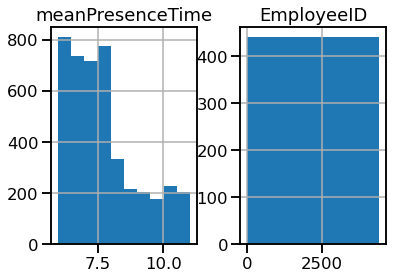

In [597]:
final_time_df.hist()

On rajoute le temps moyen effectué par les employés

In [598]:
general = general.merge(final_time_df, how='left', on='EmployeeID')

In [599]:
general

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,meanPresenceTime
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,7.373651
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,7.718969
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,7.013240
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,7.193678
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,8.006175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2,8.522277
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2,6.092954
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2,7.706632
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8,9.492595


On calcul l'heure moyenne d'arivée et de sortie

In [600]:
in_time

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaT,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaT,2015-01-15 10:01:24,2015-01-16 10:19:08,NaT,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaT,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaT,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaT,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaT,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaT,2015-03-27 09:47:30,2

In [601]:
def to_hour(td):
    return td.dt.hour + (td.dt.minute)/60

In [602]:
processed_in_time_df = in_time.iloc[:, 1:].apply(to_hour)
processed_out_time_df = out_time.iloc[:, 1:].apply(to_hour)

In [603]:
mean_starting_time_df = pd.DataFrame()
mean_ending_time_df = pd.DataFrame()
mean_starting_time_df["meanStartingTime"] = processed_in_time_df.mean(axis=1)
mean_ending_time_df["meanEndingTime"] = processed_out_time_df.mean(axis=1)

In [604]:
mean_starting_time_df["EmployeeID"] = out_time["EmployeeID"]
mean_ending_time_df["EmployeeID"] = out_time["EmployeeID"]

In [605]:
mean_starting_time_df

,meanStartingTime,EmployeeID
0,9.993032,1
1,9.980720,2
2,10.016598,3
3,9.973830,4
4,9.990068,5
...,...,...
4405,10.011317,4406
4406,9.996196,4407
4407,9.971501,4408
4408,10.010650,4409


In [606]:
mean_ending_time_df

,meanEndingTime,EmployeeID
0,17.367170,1
1,17.698446,2
2,17.030096,3
3,17.167305,4
4,17.996327,5
...,...,...
4405,18.533539,4406
4406,16.089281,4407
4407,17.678427,4408
4408,19.502974,4409


In [607]:
general = general.merge(mean_starting_time_df, how='left', on='EmployeeID')
general = general.merge(mean_ending_time_df, how='left', on='EmployeeID')

In [608]:
general

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,meanPresenceTime,meanStartingTime,meanEndingTime
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,7.373651,9.993032,17.367170
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,7.718969,9.980720,17.698446
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,7.013240,10.016598,17.030096
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,7.193678,9.973830,17.167305
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,8.006175,9.990068,17.996327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2,8.522277,10.011317,18.533539
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2,6.092954,9.996196,16.089281
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2,7.706632,9.971501,17.678427
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8,9.492595,10.010650,19.502974


In [609]:
in_time

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaT,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaT,2015-01-15 10:01:24,2015-01-16 10:19:08,NaT,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaT,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaT,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaT,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaT,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaT,2015-03-27 09:47:30,2

In [610]:
sum_absence_day_df = pd.DataFrame()
sum_absence_day_df["EmployeeID"] = in_time["EmployeeID"]
sum_absence_day_df["DayOfAbsence"] = in_time.isnull().sum(axis=1)

In [611]:
sum_absence_day_df

,EmployeeID,DayOfAbsence
0,1,29
1,2,25
2,3,19
3,4,26
4,5,16
...,...,...
4405,4406,18
4406,4407,20
4407,4408,30
4408,4409,20


In [612]:
count_present_day_df = pd.DataFrame()
count_present_day_df["EmployeeID"] = in_time["EmployeeID"]
count_present_day_df["DayOfPresence"] = in_time.count(axis=1)

In [613]:
count_present_day_df

,EmployeeID,DayOfPresence
0,1,233
1,2,237
2,3,243
3,4,236
4,5,246
...,...,...
4405,4406,244
4406,4407,242
4407,4408,232
4408,4409,242


In [614]:
general = general.merge(sum_absence_day_df, how='left', on='EmployeeID')
general = general.merge(count_present_day_df, how='left', on='EmployeeID')
general

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,meanPresenceTime,meanStartingTime,meanEndingTime,DayOfAbsence,DayOfPresence
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,7.373651,9.993032,17.367170,29,233
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,7.718969,9.980720,17.698446,25,237
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,7.013240,10.016598,17.030096,19,243
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,7.193678,9.973830,17.167305,26,236
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,8.006175,9.990068,17.996327,16,246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2,8.522277,10.011317,18.533539,18,244
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2,6.092954,9.996196,16.089281,20,242
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2,7.706632,9.971501,17.678427,30,232
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8,9.492595,10.010650,19.502974,20,242


In [615]:
disc = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
disc

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

In [616]:
analysis_df = general

In [617]:
general = general.dropna(axis=0)

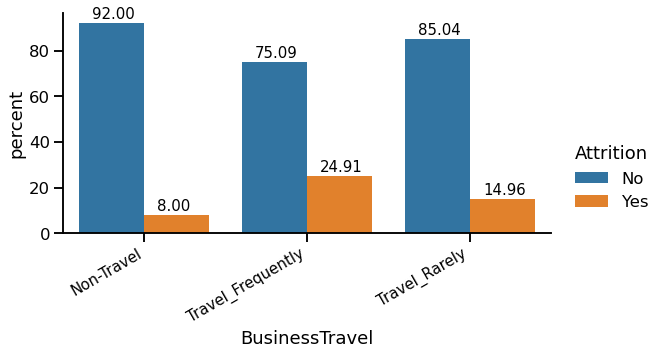

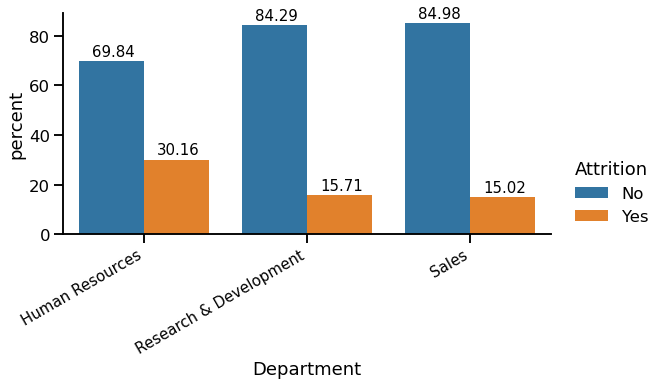

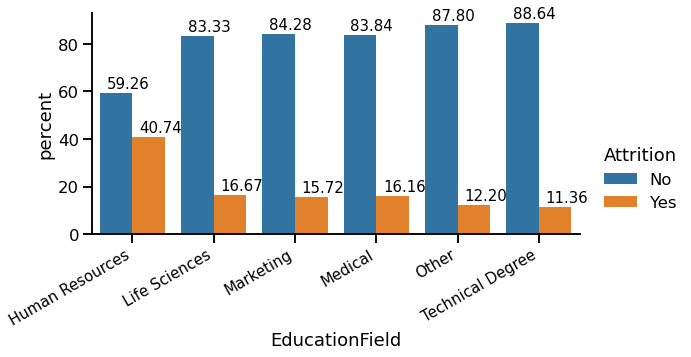

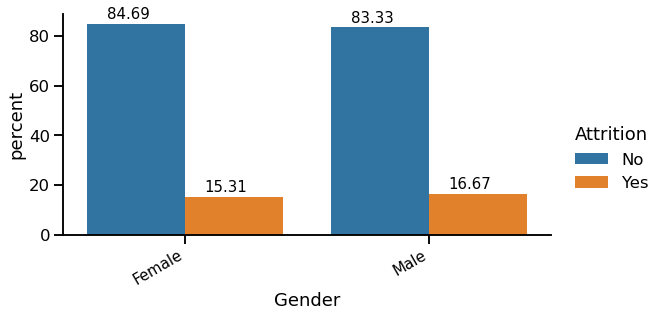

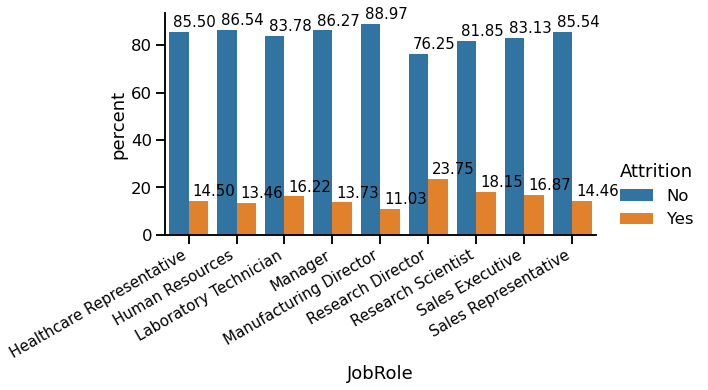

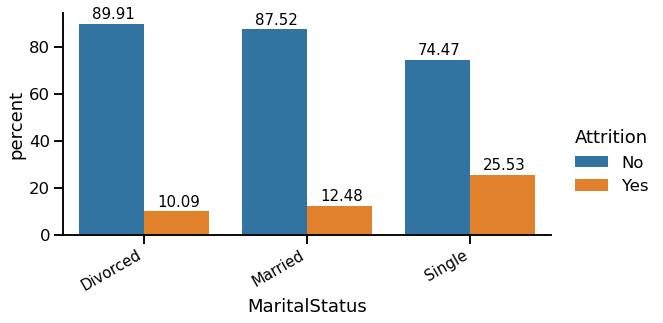

In [618]:
from itertools import product
import seaborn as sns

y = 'Attrition'

def add_annotation(cat, c):
    x1 = c.get_x() + c.get_width() / 2 - .12
    y1 = c.get_y() + c.get_height() + 2

    cat.ax.annotate(format(c.get_height(), ".2f"), (x1, y1), size=15)

def plot_hist(name, data, annot=True):

    x = name

    temp_data = (data
                 .groupby(x)[y]
                 .value_counts(normalize=True)
                 .mul(100)
                 .rename('percent')
                 .reset_index())
    sns.set_context('talk', font_scale = 1)
    catp = sns.catplot(data=temp_data, x=name, y='percent', hue='Attrition', kind='bar', height = 4, aspect = 2, legend_out=True, margin_titles=True)
    catp.set_xticklabels(rotation=30, fontsize=15, horizontalalignment='right',)

    if annot:
        spots = catp.ax.patches
        # need to separate in half de spots to put them in the right order (first half: Attrition=no; second half Attrition=yes)
        mid = len(spots) // 2

        for i in range(0, mid) :

            add_annotation(catp, spots[i])
            add_annotation(catp, spots[mid + i])

hue_order = ['No', 'Yes']

for name in disc:
        plot_hist(name, analysis_df)

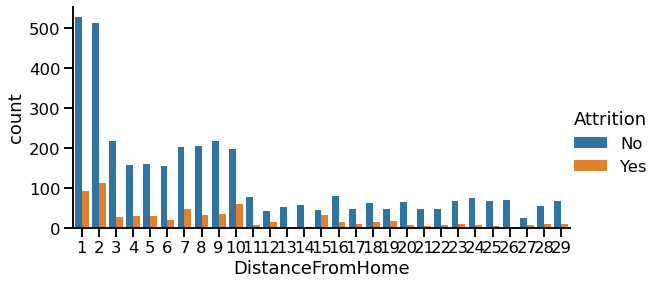

In [619]:
sns.set_context('talk', font_scale = 1)
sns.catplot(x='DistanceFromHome', hue='Attrition', data=general, kind="count", height=4, aspect=2)

In [620]:
temp_data = (general
             .groupby("DistanceFromHome")[y]
             .value_counts(normalize=True)
             .mul(100)
             .rename('percent')
             .reset_index())

In [621]:
temp_data

,DistanceFromHome,Attrition,percent
0,1,No,84.887460
1,1,Yes,15.112540
2,2,No,81.818182
3,2,Yes,18.181818
4,3,No,88.306452
5,3,Yes,11.693548
6,4,No,83.157895
7,4,Yes,16.842105
8,5,No,84.375000
9,5,Yes,15.625000


In [622]:
general.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,meanPresenceTime,meanStartingTime,meanEndingTime,DayOfAbsence,DayOfPresence
count,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,9.198996,2.912369,1.0,2207.804884,2.063898,65061.702419,2.693291,15.210634,8.0,0.794614,11.290278,2.798266,7.010497,2.191693,4.126198,7.700561,9.991736,17.692291,24.727978,237.272022
std,9.137272,8.105396,1.024728,0.0,1271.688783,1.106115,47142.310175,2.497832,3.663007,0.0,0.852397,7.785717,1.289402,6.129351,3.224994,3.569674,1.341228,0.018149,1.341414,5.497935,5.497935
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.950504,9.929079,15.942330,13.000000,226.000000
25%,30.000000,2.000000,2.000000,1.0,1108.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,6.667690,9.979582,16.652977,20.000000,233.000000
50%,36.000000,7.000000,3.000000,1.0,2208.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,7.406967,9.991953,17.400237,25.000000,237.000000
75%,43.000000,14.000000,4.000000,1.0,3308.750000,3.000000,83790.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,8.365218,10.003486,18.351950,29.000000,242.000000
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,11.030960,10.069684,21.058616,36.000000,249.000000


In [623]:
data = general["DistanceFromHome"].value_counts()

<AxesSubplot:>

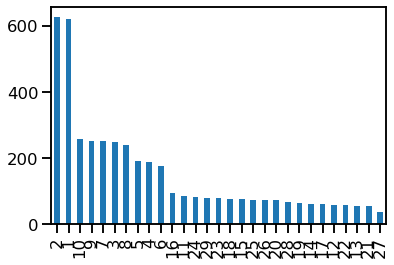

In [624]:
data.plot.bar()

<AxesSubplot:>

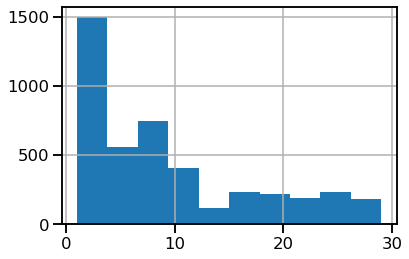

In [625]:
general["DistanceFromHome"].hist()

In [626]:
general.groupby(["Gender"]).mean()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,meanPresenceTime,meanStartingTime,meanEndingTime,DayOfAbsence,DayOfPresence
Gender,,,,,,,,,,,,,,,,,,,,,
Female,37.387244,9.621298,2.934510,1.0,2227.726651,2.099089,64669.424829,2.897494,15.151481,8.0,0.771640,11.559226,2.849658,7.150342,2.282460,4.114465,7.694963,9.992238,17.687205,24.728929,237.271071
Male,36.629855,8.916603,2.897563,1.0,2194.483244,2.040366,65324.017517,2.556740,15.250190,8.0,0.809977,11.110434,2.763899,6.916984,2.130998,4.134044,7.704304,9.991401,17.695692,24.727342,237.272658


In [627]:
general.groupby(["Gender", "Education"]).mean()

Age  DistanceFromHome  EmployeeCount   EmployeeID  \
Gender Education                                                            
Female 1          38.139665          9.994413            1.0  2262.011173   
       2          38.154286          9.068571            1.0  2224.488571   
       3          37.401429          9.380000            1.0  2217.912857   
       4          36.793926          9.954447            1.0  2230.934924   
       5          35.272727         11.772727            1.0  2233.590909   
Male   1          37.802432         10.352584            1.0  2219.924012   
       2          36.091463          8.445122            1.0  2234.758130   
       3          36.124875          8.629371            1.0  2167.418581   
       4          37.444292          9.162311            1.0  2204.474553   
       5          33.935065          7.207792            1.0  2085.948052   

                  JobLevel  MonthlyIncome  NumCompaniesWorked  \
Gender Education                                                
Female 1          1.893855   62809.888268            3.268156   
       2          2.051429   66328.342857            2.937143   
       3          2.155714   68617.514286            2.941429   
       4          2.162690   56834.924078            2.687636   
       5          1.863636   73764.545455            2.681818   
Male   1          1.875380   60997.142857            2.489362   
       2          2.042683   63899.349593            2.552846   
       3          2.079920   66692.717283            2.580420   
       4          2.037139   66923.232462            2.515818   
       5          2.246753   60022.467532            2.948052   

                  PercentSalaryHike  StandardHours  StockOptionLevel  \
Gender Education                                                       
Female 1                  16.351955            8.0          0.882682   
       2                  15.345714            8.0          0.777143   
       3                  14.904286            8.0          0.735714   
       4                  15.013015            8.0          0.778742   
       5                  14.454545            8.0          0.772727   
Male   1                  15.176292            8.0          0.835866   
       2                  15.260163            8.0          0.752033   
       3                  15.239760            8.0          0.816184   
       4                  15.416781            8.0          0.796424   
       5                  14.064935            8.0          1.116883   

                  TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
Gender Education                                                             
Female 1                  11.631285               2.865922        7.229050   
       2                  11.277143               2.865714        6.354286   
       3                  11.577143               2.860000        7.317143   
       4                  11.752711               2.839479        7.505423   
       5                  11.318182               2.681818        6.909091   
Male   1                  12.392097               2.756839        7.647416   
       2                  10.668699               2.532520        6.280488   
       3                  10.684316               2.886114        7.031968   
       4                  11.507565               2.782669        6.881706   
       5                  10.246753               2.506494        6.701299   

                  YearsSinceLastPromotion  YearsWithCurrManager  \
Gender Education                                                  
Female 1                         2.296089              4.458101   
       2                         2.134286              3.480000   
       3                         2.405714              4.272857   
       4                         2.054230              4.219089   
       5                         3.318182              4.136364   
Male   1                         2.133739      

In [628]:
general.groupby(["Gender", "MaritalStatus"]).mean()

Age  DistanceFromHome  Education  EmployeeCount  \
Gender MaritalStatus                                                          
Female Divorced       36.818681          9.664835   2.923077            1.0   
       Married        38.362663          9.696790   2.925089            1.0   
       Single         36.274047          9.477314   2.956443            1.0   
Male   Divorced       37.876238          8.963696   2.853135            1.0   
       Married        37.360206          9.427101   2.889365            1.0   
       Single         34.748244          8.186183   2.940281            1.0   

                       EmployeeID  JobLevel  MonthlyIncome  \
Gender MaritalStatus                                         
Female Divorced       2201.434066  2.123626   71748.598901   
       Married        2211.877527  2.078478   65076.254459   
       Single         2269.286751  2.114338   59371.851180   
Male   Divorced       2209.128713  2.079208   65863.696370   
       Married        2203.228988  2.072041   66793.910806   
       Single         2172.149883  1.969555   62934.156909   

                      NumCompaniesWorked  PercentSalaryHike  StandardHours  \
Gender MaritalStatus                                                         
Female Divorced                 2.991758          15.409341            8.0   
       Married                  2.770511          14.952438            8.0   
       Single                   3.029038          15.284936            8.0   
Male   Divorced                 2.833333          15.141914            8.0   
       Married                  2.562607          15.279588            8.0   
       Single                   2.352459          15.286885            8.0   

                      StockOptionLevel  TotalWorkingYears  \
Gender MaritalStatus                                        
Female Divorced               0.777473          11.950549   
       Married                0.750297          11.858502   
       Single                 0.800363          10.843920   
Male   Divorced               0.834983          11.714521   
       Married                0.764151          11.673242   
       Single                 0.854801           9.913349   

                      TrainingTimesLastYear  YearsAtCompany  \
Gender MaritalStatus                                          
Female Divorced                    2.898352        7.640110   
       Married                     2.831153        7.448276   
       Single                      2.845735        6.372051   
Male   Divorced                    2.727723        7.084158   
       Married                     2.730703        7.211835   
       Single                      2.834895        6.395785   

                      YearsSinceLastPromotion  YearsWithCurrManager  \
Gender MaritalStatus                                                  
Female Divorced                      2.326923              4.162088   
       Married                       2.331748              4.131986   
       Single                        2.177858              4.056261   
Male   Divorced                      2.057756              4.231023   
       Married                       2.415952              4.348199   
       Single                        1.793911              3.772834   

                      meanPresenceTime  meanStartingTime  meanEndingTime  \
Gender MaritalStatus                                                       
Female Divorced               7.636376          9.991850       17.628233   
       Married                7.714656          9.992567       17.707238   
       Single                 7.703609          9.991993       17.695587   
Male   Divorced               7.779909          9.991856       17.771778   
       Married                7.685346          9.991784       17.677105   
       Single                 7.676540          9.990554       17.667078   

                      DayOfAbsence  DayOfPresence  
Gender MaritalStatus                             

In [629]:
general.groupby(['DistanceFromHome']).mean()

,Age,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,meanPresenceTime,meanStartingTime,meanEndingTime,DayOfAbsence,DayOfPresence
DistanceFromHome,,,,,,,,,,,,,,,,,,,,
1,37.004823,2.935691,1.0,2190.236334,2.101286,74263.520900,2.782958,15.035370,8.0,0.837621,11.043408,2.771704,6.725080,2.305466,4.017685,7.712915,9.992796,17.705718,24.683280,237.316720
2,37.098884,2.945774,1.0,2218.553429,2.092504,61553.046252,2.810207,15.007974,8.0,0.800638,11.524721,2.767145,7.001595,2.250399,3.944179,7.702585,9.991936,17.694483,24.768740,237.231260
3,36.927419,2.862903,1.0,2265.967742,1.943548,57578.185484,2.782258,14.495968,8.0,0.814516,11.350806,2.645161,7.580645,2.750000,4.814516,7.604465,9.990859,17.595269,24.338710,237.661290
4,38.231579,2.931579,1.0,2293.500000,2.294737,67250.684211,2.768421,15.394737,8.0,0.563158,11.726316,2.905263,6.484211,2.036842,3.726316,7.687146,9.990757,17.677867,24.868421,237.131579
5,37.338542,2.973958,1.0,2146.911458,2.104167,65825.260417,2.932292,15.640625,8.0,0.703125,11.348958,2.937500,6.791667,1.677083,3.770833,7.351541,9.991428,17.343021,25.390625,236.609375
6,37.186441,2.864407,1.0,2198.542373,2.016949,56150.847458,2.254237,14.694915,8.0,0.881356,12.542373,2.745763,8.525424,2.593220,4.898305,7.784146,9.991461,17.775614,24.666667,237.333333
7,35.250000,2.940476,1.0,2172.976190,2.047619,61265.000000,2.821429,15.761905,8.0,0.785714,10.095238,2.880952,6.035714,1.797619,3.916667,7.693713,9.989383,17.683139,25.166667,236.833333
8,36.196653,2.761506,1.0,2218.255230,2.263598,66194.476987,2.493724,15.564854,8.0,0.673640,10.439331,2.815900,5.882845,1.740586,3.723849,7.899629,9.991348,17.890929,24.271967,237.728033
9,36.810277,2.798419,1.0,2181.802372,1.996047,70555.138340,2.758893,15.363636,8.0,0.770751,10.320158,2.841897,5.545455,1.766798,3.478261,7.717938,9.990591,17.708510,24.517787,237.482213


In [630]:
def category_distance(distance):
    if distance <= 5:
        return '1-5'
    elif (distance > 5) & (distance <= 10):
        return '5-10'
    elif (distance > 10) & (distance <= 15):
        return '5-10'
    elif (distance > 15) & (distance <= 20):
        return '15-20'
    elif (distance > 20) & (distance <= 25):
        return '20-25'
    elif (distance > 25) & (distance <= 30):
        return '25-30'
    else:
        return '+30'

In [631]:
def category_ages(age):
    if age <= 20:
        return '<20 ans'
    elif (age > 20) & (age <= 30):
        return '20-30 ans'
    elif (age > 30) & (age <= 40):
        return '30-40 ans'
    elif (age > 40) & (age <= 50):
        return '40-50 ans'
    elif (age > 50) & (age <= 60):
        return '50-60 ans'
    else:
        return '+60 ans'

On trie le tableau pour mieux afficher le graphique

In [632]:
general = general.sort_values(by='DistanceFromHome')

In [633]:
general

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,meanPresenceTime,meanStartingTime,meanEndingTime,DayOfAbsence,DayOfPresence
2000,28,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,2001,Male,2,Healthcare Representative,Single,74570,3.0,Y,11,8,2,10.0,1,8,1,7,6.568143,9.978857,16.547245,19,243
565,29,No,Travel_Frequently,Research & Development,1,4,Medical,1,566,Male,3,Research Scientist,Divorced,27160,0.0,Y,18,8,0,8.0,2,7,1,1,7.102372,9.980675,17.082902,29,233
1385,30,No,Non-Travel,Sales,1,3,Medical,1,1386,Female,1,Sales Executive,Divorced,54700,1.0,Y,18,8,1,12.0,2,12,6,10,6.809022,10.010213,16.819433,26,236
568,38,No,Travel_Rarely,Research & Development,1,3,Medical,1,569,Female,1,Human Resources,Married,38160,1.0,Y,13,8,2,7.0,2,7,5,0,6.523464,10.006490,16.530605,35,227
3700,36,No,Travel_Rarely,Sales,1,3,Marketing,1,3701,Male,2,Research Scientist,Single,35050,1.0,Y,12,8,2,10.0,2,10,1,8,6.290198,9.999410,16.290413,35,227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,41,No,Travel_Rarely,Research & Development,29,1,Life Sciences,1,2983,Male,1,Laboratory Technician,Single,23790,1.0,Y,12,8,0,22.0,6,22,0,4,6.925647,9.973529,16.898669,23,239
3767,31,Yes,Travel_Frequently,Research & Development,29,3,Life Sciences,1,3768,Female,2,Healthcare Representative,Single,25150,1.0,Y,14,8,0,7.0,3,7,7,7,6.394127,10.004272,16.398389,23,239
78,29,Yes,Travel_Rarely,Research & Development,29,3,Medical,1,79,Female,1,Research Scientist,Married,23070,1.0,Y,13,8,1,7.0,0,7,0,7,10.477789,9.978768,20.456522,31,231
431,20,Yes,Travel_Rarely,Research & Development,29,3,Life Sciences,1,432,Female,3,Laboratory Technician,Single,27070,1.0,Y,11,8,0,1.0,2,1,0,0,6.083652,9.989118,16.071832,19,243


In [634]:
distance_df = general

In [635]:
distance_df['DistanceFromHome'] = general['DistanceFromHome'].map(category_distance)

In [636]:
age_df = general.sort_values(by='Age')

In [637]:
general['Age'] = general['Age'].map(category_ages)

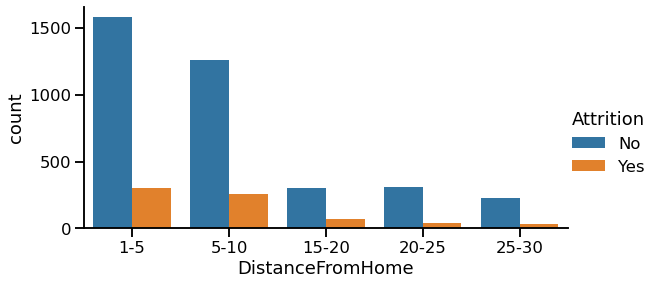

In [638]:
sns.set_context('talk', font_scale = 1)
sns.catplot(x='DistanceFromHome', hue='Attrition', data=distance_df, kind="count", height=4, aspect=2)

In [639]:
general.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'meanPresenceTime', 'meanStartingTime', 'meanEndingTime',
       'DayOfAbsence', 'DayOfPresence'],
      dtype='object')

In [640]:
general

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,meanPresenceTime,meanStartingTime,meanEndingTime,DayOfAbsence,DayOfPresence
2000,20-30 ans,No,Travel_Rarely,Research & Development,1-5,3,Life Sciences,1,2001,Male,2,Healthcare Representative,Single,74570,3.0,Y,11,8,2,10.0,1,8,1,7,6.568143,9.978857,16.547245,19,243
565,20-30 ans,No,Travel_Frequently,Research & Development,1-5,4,Medical,1,566,Male,3,Research Scientist,Divorced,27160,0.0,Y,18,8,0,8.0,2,7,1,1,7.102372,9.980675,17.082902,29,233
1385,20-30 ans,No,Non-Travel,Sales,1-5,3,Medical,1,1386,Female,1,Sales Executive,Divorced,54700,1.0,Y,18,8,1,12.0,2,12,6,10,6.809022,10.010213,16.819433,26,236
568,30-40 ans,No,Travel_Rarely,Research & Development,1-5,3,Medical,1,569,Female,1,Human Resources,Married,38160,1.0,Y,13,8,2,7.0,2,7,5,0,6.523464,10.006490,16.530605,35,227
3700,30-40 ans,No,Travel_Rarely,Sales,1-5,3,Marketing,1,3701,Male,2,Research Scientist,Single,35050,1.0,Y,12,8,2,10.0,2,10,1,8,6.290198,9.999410,16.290413,35,227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,40-50 ans,No,Travel_Rarely,Research & Development,25-30,1,Life Sciences,1,2983,Male,1,Laboratory Technician,Single,23790,1.0,Y,12,8,0,22.0,6,22,0,4,6.925647,9.973529,16.898669,23,239
3767,30-40 ans,Yes,Travel_Frequently,Research & Development,25-30,3,Life Sciences,1,3768,Female,2,Healthcare Representative,Single,25150,1.0,Y,14,8,0,7.0,3,7,7,7,6.394127,10.004272,16.398389,23,239
78,20-30 ans,Yes,Travel_Rarely,Research & Development,25-30,3,Medical,1,79,Female,1,Research Scientist,Married,23070,1.0,Y,13,8,1,7.0,0,7,0,7,10.477789,9.978768,20.456522,31,231
431,<20 ans,Yes,Travel_Rarely,Research & Development,25-30,3,Life Sciences,1,432,Female,3,Laboratory Technician,Single,27070,1.0,Y,11,8,0,1.0,2,1,0,0,6.083652,9.989118,16.071832,19,243


In [641]:
cont = general.drop(disc, axis=1)
cont = cont.drop(['Attrition'], axis=1).columns

In [642]:
general

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,meanPresenceTime,meanStartingTime,meanEndingTime,DayOfAbsence,DayOfPresence
2000,20-30 ans,No,Travel_Rarely,Research & Development,1-5,3,Life Sciences,1,2001,Male,2,Healthcare Representative,Single,74570,3.0,Y,11,8,2,10.0,1,8,1,7,6.568143,9.978857,16.547245,19,243
565,20-30 ans,No,Travel_Frequently,Research & Development,1-5,4,Medical,1,566,Male,3,Research Scientist,Divorced,27160,0.0,Y,18,8,0,8.0,2,7,1,1,7.102372,9.980675,17.082902,29,233
1385,20-30 ans,No,Non-Travel,Sales,1-5,3,Medical,1,1386,Female,1,Sales Executive,Divorced,54700,1.0,Y,18,8,1,12.0,2,12,6,10,6.809022,10.010213,16.819433,26,236
568,30-40 ans,No,Travel_Rarely,Research & Development,1-5,3,Medical,1,569,Female,1,Human Resources,Married,38160,1.0,Y,13,8,2,7.0,2,7,5,0,6.523464,10.006490,16.530605,35,227
3700,30-40 ans,No,Travel_Rarely,Sales,1-5,3,Marketing,1,3701,Male,2,Research Scientist,Single,35050,1.0,Y,12,8,2,10.0,2,10,1,8,6.290198,9.999410,16.290413,35,227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,40-50 ans,No,Travel_Rarely,Research & Development,25-30,1,Life Sciences,1,2983,Male,1,Laboratory Technician,Single,23790,1.0,Y,12,8,0,22.0,6,22,0,4,6.925647,9.973529,16.898669,23,239
3767,30-40 ans,Yes,Travel_Frequently,Research & Development,25-30,3,Life Sciences,1,3768,Female,2,Healthcare Representative,Single,25150,1.0,Y,14,8,0,7.0,3,7,7,7,6.394127,10.004272,16.398389,23,239
78,20-30 ans,Yes,Travel_Rarely,Research & Development,25-30,3,Medical,1,79,Female,1,Research Scientist,Married,23070,1.0,Y,13,8,1,7.0,0,7,0,7,10.477789,9.978768,20.456522,31,231
431,<20 ans,Yes,Travel_Rarely,Research & Development,25-30,3,Life Sciences,1,432,Female,3,Laboratory Technician,Single,27070,1.0,Y,11,8,0,1.0,2,1,0,0,6.083652,9.989118,16.071832,19,243


In [643]:
general['meanPresenceTime'].max()

11.03096035137702

In [644]:
general['meanPresenceTime'].min()

5.950504160548214

In [645]:
general

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,meanPresenceTime,meanStartingTime,meanEndingTime,DayOfAbsence,DayOfPresence
2000,20-30 ans,No,Travel_Rarely,Research & Development,1-5,3,Life Sciences,1,2001,Male,2,Healthcare Representative,Single,74570,3.0,Y,11,8,2,10.0,1,8,1,7,6.568143,9.978857,16.547245,19,243
565,20-30 ans,No,Travel_Frequently,Research & Development,1-5,4,Medical,1,566,Male,3,Research Scientist,Divorced,27160,0.0,Y,18,8,0,8.0,2,7,1,1,7.102372,9.980675,17.082902,29,233
1385,20-30 ans,No,Non-Travel,Sales,1-5,3,Medical,1,1386,Female,1,Sales Executive,Divorced,54700,1.0,Y,18,8,1,12.0,2,12,6,10,6.809022,10.010213,16.819433,26,236
568,30-40 ans,No,Travel_Rarely,Research & Development,1-5,3,Medical,1,569,Female,1,Human Resources,Married,38160,1.0,Y,13,8,2,7.0,2,7,5,0,6.523464,10.006490,16.530605,35,227
3700,30-40 ans,No,Travel_Rarely,Sales,1-5,3,Marketing,1,3701,Male,2,Research Scientist,Single,35050,1.0,Y,12,8,2,10.0,2,10,1,8,6.290198,9.999410,16.290413,35,227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,40-50 ans,No,Travel_Rarely,Research & Development,25-30,1,Life Sciences,1,2983,Male,1,Laboratory Technician,Single,23790,1.0,Y,12,8,0,22.0,6,22,0,4,6.925647,9.973529,16.898669,23,239
3767,30-40 ans,Yes,Travel_Frequently,Research & Development,25-30,3,Life Sciences,1,3768,Female,2,Healthcare Representative,Single,25150,1.0,Y,14,8,0,7.0,3,7,7,7,6.394127,10.004272,16.398389,23,239
78,20-30 ans,Yes,Travel_Rarely,Research & Development,25-30,3,Medical,1,79,Female,1,Research Scientist,Married,23070,1.0,Y,13,8,1,7.0,0,7,0,7,10.477789,9.978768,20.456522,31,231
431,<20 ans,Yes,Travel_Rarely,Research & Development,25-30,3,Life Sciences,1,432,Female,3,Laboratory Technician,Single,27070,1.0,Y,11,8,0,1.0,2,1,0,0,6.083652,9.989118,16.071832,19,243


In [646]:
time_category_df = general.copy()

In [647]:
time_category_df['meanPresenceTime'] = pd.cut(time_category_df['meanPresenceTime'], bins=10, include_lowest=True)

In [648]:
time_category_df['meanPresenceTime']

2000      (6.459, 6.967]
565       (6.967, 7.475]
1385      (6.459, 6.967]
568       (6.459, 6.967]
3700      (5.944, 6.459]
              ...       
2982      (6.459, 6.967]
3767      (5.944, 6.459]
78      (10.015, 10.523]
431       (5.944, 6.459]
4019      (6.459, 6.967]
Name: meanPresenceTime, Length: 4382, dtype: category
Categories (10, interval[float64]): [(5.944, 6.459] < (6.459, 6.967] < (6.967, 7.475] < (7.475, 7.983] ... (8.999, 9.507] < (9.507, 10.015] < (10.015, 10.523] < (10.523, 11.031]]

In [649]:
time_category_df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,meanPresenceTime,meanStartingTime,meanEndingTime,DayOfAbsence,DayOfPresence
2000,20-30 ans,No,Travel_Rarely,Research & Development,1-5,3,Life Sciences,1,2001,Male,2,Healthcare Representative,Single,74570,3.0,Y,11,8,2,10.0,1,8,1,7,"(6.459, 6.967]",9.978857,16.547245,19,243
565,20-30 ans,No,Travel_Frequently,Research & Development,1-5,4,Medical,1,566,Male,3,Research Scientist,Divorced,27160,0.0,Y,18,8,0,8.0,2,7,1,1,"(6.967, 7.475]",9.980675,17.082902,29,233
1385,20-30 ans,No,Non-Travel,Sales,1-5,3,Medical,1,1386,Female,1,Sales Executive,Divorced,54700,1.0,Y,18,8,1,12.0,2,12,6,10,"(6.459, 6.967]",10.010213,16.819433,26,236
568,30-40 ans,No,Travel_Rarely,Research & Development,1-5,3,Medical,1,569,Female,1,Human Resources,Married,38160,1.0,Y,13,8,2,7.0,2,7,5,0,"(6.459, 6.967]",10.006490,16.530605,35,227
3700,30-40 ans,No,Travel_Rarely,Sales,1-5,3,Marketing,1,3701,Male,2,Research Scientist,Single,35050,1.0,Y,12,8,2,10.0,2,10,1,8,"(5.944, 6.459]",9.999410,16.290413,35,227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,40-50 ans,No,Travel_Rarely,Research & Development,25-30,1,Life Sciences,1,2983,Male,1,Laboratory Technician,Single,23790,1.0,Y,12,8,0,22.0,6,22,0,4,"(6.459, 6.967]",9.973529,16.898669,23,239
3767,30-40 ans,Yes,Travel_Frequently,Research & Development,25-30,3,Life Sciences,1,3768,Female,2,Healthcare Representative,Single,25150,1.0,Y,14,8,0,7.0,3,7,7,7,"(5.944, 6.459]",10.004272,16.398389,23,239
78,20-30 ans,Yes,Travel_Rarely,Research & Development,25-30,3,Medical,1,79,Female,1,Research Scientist,Married,23070,1.0,Y,13,8,1,7.0,0,7,0,7,"(10.015, 10.523]",9.978768,20.456522,31,231
431,<20 ans,Yes,Travel_Rarely,Research & Development,25-30,3,Life Sciences,1,432,Female,3,Laboratory Technician,Single,27070,1.0,Y,11,8,0,1.0,2,1,0,0,"(5.944, 6.459]",9.989118,16.071832,19,243


In [650]:
general

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,meanPresenceTime,meanStartingTime,meanEndingTime,DayOfAbsence,DayOfPresence
2000,20-30 ans,No,Travel_Rarely,Research & Development,1-5,3,Life Sciences,1,2001,Male,2,Healthcare Representative,Single,74570,3.0,Y,11,8,2,10.0,1,8,1,7,6.568143,9.978857,16.547245,19,243
565,20-30 ans,No,Travel_Frequently,Research & Development,1-5,4,Medical,1,566,Male,3,Research Scientist,Divorced,27160,0.0,Y,18,8,0,8.0,2,7,1,1,7.102372,9.980675,17.082902,29,233
1385,20-30 ans,No,Non-Travel,Sales,1-5,3,Medical,1,1386,Female,1,Sales Executive,Divorced,54700,1.0,Y,18,8,1,12.0,2,12,6,10,6.809022,10.010213,16.819433,26,236
568,30-40 ans,No,Travel_Rarely,Research & Development,1-5,3,Medical,1,569,Female,1,Human Resources,Married,38160,1.0,Y,13,8,2,7.0,2,7,5,0,6.523464,10.006490,16.530605,35,227
3700,30-40 ans,No,Travel_Rarely,Sales,1-5,3,Marketing,1,3701,Male,2,Research Scientist,Single,35050,1.0,Y,12,8,2,10.0,2,10,1,8,6.290198,9.999410,16.290413,35,227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,40-50 ans,No,Travel_Rarely,Research & Development,25-30,1,Life Sciences,1,2983,Male,1,Laboratory Technician,Single,23790,1.0,Y,12,8,0,22.0,6,22,0,4,6.925647,9.973529,16.898669,23,239
3767,30-40 ans,Yes,Travel_Frequently,Research & Development,25-30,3,Life Sciences,1,3768,Female,2,Healthcare Representative,Single,25150,1.0,Y,14,8,0,7.0,3,7,7,7,6.394127,10.004272,16.398389,23,239
78,20-30 ans,Yes,Travel_Rarely,Research & Development,25-30,3,Medical,1,79,Female,1,Research Scientist,Married,23070,1.0,Y,13,8,1,7.0,0,7,0,7,10.477789,9.978768,20.456522,31,231
431,<20 ans,Yes,Travel_Rarely,Research & Development,25-30,3,Life Sciences,1,432,Female,3,Laboratory Technician,Single,27070,1.0,Y,11,8,0,1.0,2,1,0,0,6.083652,9.989118,16.071832,19,243


In [651]:
temp_data = time_category_df.groupby(by="meanPresenceTime")['Attrition'].value_counts().rename('count').reset_index()

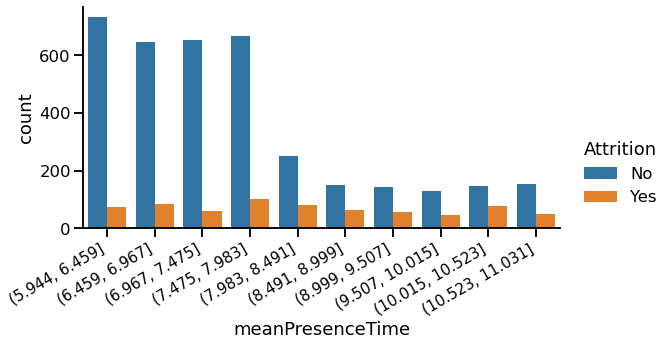

In [652]:
catp = sns.catplot(data=temp_data, x='meanPresenceTime', y='count', hue='Attrition', kind='bar', height = 4, aspect = 2, legend_out=True, margin_titles=True)
catp.set_xticklabels(rotation=30, fontsize=15, horizontalalignment='right',)

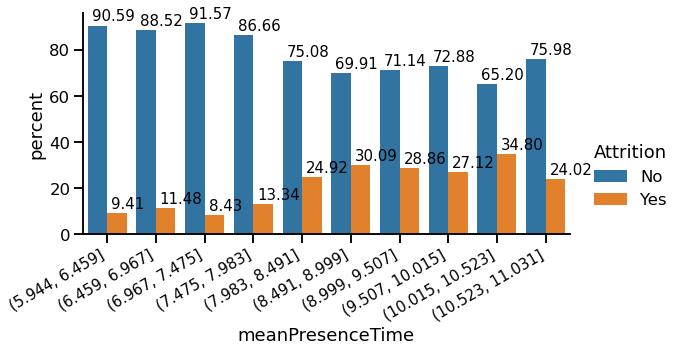

In [653]:
plot_hist("meanPresenceTime", time_category_df)

In [724]:
number_of_people_making_their_hours = general[general['meanPresenceTime'] >= 8]['meanPresenceTime'].count()

In [670]:
ratio_people_making_hours = number_of_people_making_their_hours / general['EmployeeID'].count()

In [671]:
ratio_people_making_hours

0.2998630762209037

In [672]:
percentage_people_making_hours = ratio_people_making_hours * 100

In [673]:
percentage_people_making_hours

29.98630762209037

In [706]:
percentage = {'Percent':[100-percentage_people_making_hours, percentage_people_making_hours],'Value':['Working less than 8h','Working more than 8h']}

In [707]:
percentage_people_making_hours_df = pd.DataFrame(percentage)

In [708]:
percentage_people_making_hours_df

,Percent,Value
0,70.013692,Working less than 8h
1,29.986308,Working more than 8h


In [709]:
number_of_people_making_their_hours = time_category_df.groupby('meanPresenceTime')['Attrition'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

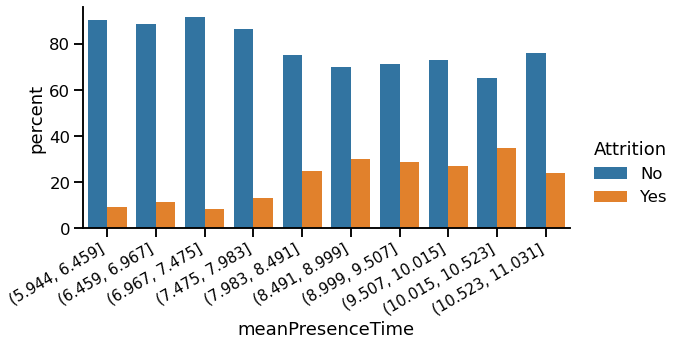

In [710]:
catp = sns.catplot(data=number_of_people_making_their_hours, x='meanPresenceTime', y='percent', hue='Attrition', kind='bar', height = 4, aspect = 2, legend_out=True, margin_titles=True)
catp.set_xticklabels(rotation=30, fontsize=15, horizontalalignment='right',)

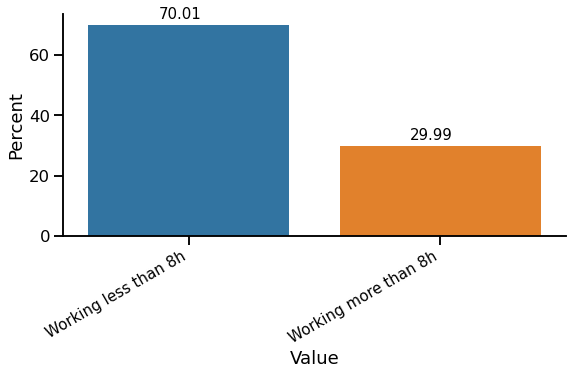

In [714]:
catp = sns.catplot(data=percentage_people_making_hours_df, x='Value', y='Percent', kind='bar', height = 4, aspect = 2, legend_out=True, margin_titles=True)
catp.set_xticklabels(rotation=30, fontsize=15, horizontalalignment='right',)

spots = catp.ax.patches
# need to separate in half de spots to put them in the right order (first half: Attrition=no; second half Attrition=yes)
mid = len(spots) // 2

for i in range(0, mid) :

    add_annotation(catp, spots[i])
    add_annotation(catp, spots[mid + i])

In [716]:
plot_hist('Value', percentage_people_making_hours_df)

KeyError: 'Column not found: Attrition'

In [721]:
from itertools import product
import seaborn as sns

def add_annotation(cat, c):
    x1 = c.get_x() + c.get_width() / 2 - .12
    y1 = c.get_y() + c.get_height() + 2

    cat.ax.annotate(format(c.get_height(), ".2f"), (x1, y1), size=15)

def plot_hist(name, data, y, annot=True):

    x = name
    second = y

    temp_data = (data
                 .groupby(x)[y]
                 .value_counts(normalize=True)
                 .mul(100)
                 .rename('percent')
                 .reset_index())
    sns.set_context('talk', font_scale = 1)
    catp = sns.catplot(data=temp_data, x=name, y=second, hue=second, kind='bar', height = 4, aspect = 2, legend_out=True, margin_titles=True)
    catp.set_xticklabels(rotation=30, fontsize=15, horizontalalignment='right',)

    if annot:
        spots = catp.ax.patches
        # need to separate in half de spots to put them in the right order (first half: Attrition=no; second half Attrition=yes)
        mid = len(spots) // 2

        for i in range(0, mid) :

            add_annotation(catp, spots[i])
            add_annotation(catp, spots[mid + i])

hue_order = ['No', 'Yes']

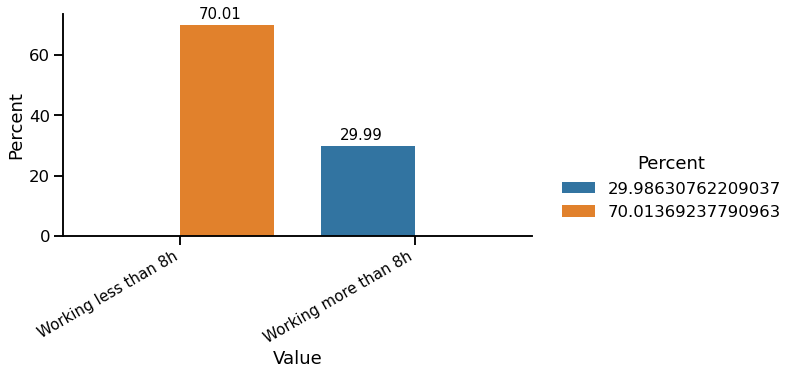

In [725]:
plot_hist('Value', percentage_people_making_hours_df, 'Percent')